In [102]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [103]:
from sklearn. preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

In [104]:
# df15 = pd.read_csv("20151001hundehalter.csv")
# df16 = pd.read_csv("20160307hundehalter.csv")
# df17 = pd.read_csv("20170308hundehalter.csv")
# df = pd.read_csv("zuordnungstabellehunderassehundetyp.csv")
df = pd.read_csv("20170308hundehalter.csv")
df

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
0,126,61-70,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,171,61-70,m,3.0,31.0,Berner Sennenhund,NaN,NaN,NaN,I,2009,m,tricolor
2,574,61-70,w,2.0,23.0,Mischling gross,NaN,NaN,NaN,I,2013,w,schwarz
3,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
4,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7150,135718,31-40,m,9.0,91.0,Mischling gross,NaN,NaN,NaN,I,2015,w,golden
7151,135725,31-40,w,7.0,74.0,Boxer,NaN,NaN,NaN,I,2016,w,gelb/weiss
7152,135726,11-20,w,11.0,111.0,Pinscher,NaN,NaN,NaN,K,2016,w,schwarz
7153,135728,31-40,w,7.0,72.0,Whippet,NaN,NaN,NaN,I,2016,w,vierfarbig


In [105]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7155 entries, 0 to 7154
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HALTER_ID         7155 non-null   int64  
 1   ALTER             7154 non-null   object 
 2   GESCHLECHT        7155 non-null   object 
 3   STADTKREIS        7154 non-null   float64
 4   STADTQUARTIER     7154 non-null   float64
 5   RASSE1            7155 non-null   object 
 6   RASSE1_MISCHLING  618 non-null    object 
 7   RASSE2            543 non-null    object 
 8   RASSE2_MISCHLING  0 non-null      float64
 9   RASSENTYP         7155 non-null   object 
 10  GEBURTSJAHR_HUND  7155 non-null   int64  
 11  GESCHLECHT_HUND   7155 non-null   object 
 12  HUNDEFARBE        7155 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 726.8+ KB


In [106]:
for i in df.columns:
    nulls = df[i].isnull().sum()
    if nulls != 0:
        print(i, nulls)
        if nulls == df.shape[0]:
            print(f'\t only nulls in {i}')


ALTER 1
STADTKREIS 1
STADTQUARTIER 1
RASSE1_MISCHLING 6537
RASSE2 6612
RASSE2_MISCHLING 7155
	 only nulls in RASSE2_MISCHLING


In [107]:
# drop 'RASSE2_MISCHLING' becasue it only has nulls
df.drop('RASSE2_MISCHLING', axis=1, inplace=True)

In [108]:
rename_map = {
    "ALTER" : "Age",
    "GESCHLECHT" : "Owner Gender",
    "STADTKREIS" : "District",
    "RASSE1" : "Primary Breed",
    "RASSE2" : "Secondary Breed",
    "RASSENTYP" : "Breed Type",
    "GEBURTSJAHR_HUND" : "Year of Birth",
    "GESCHLECHT_HUND" : "Dog Gender",
    "HUNDEFARBE" : "Color",
}
df.rename(columns = rename_map, inplace=True)
# df

In [109]:
df['Secondary Breed'] = df['Secondary Breed'].fillna(False)

In [110]:
# replacing values from 'RASSE1_MISCHLING' column values, because it only contains 'Mischling' and 'NaN'
df['RASSE1_MISCHLING'].value_counts().reset_index()
# df['RASSE1_MISCHLING'].nunique()

filt = df['RASSE1_MISCHLING'] == 'Mischling' 
# df.loc[filt,'RASSE1_MISCHLING'] = True

# filt2 = (df['RASSE1_MISCHLING'] == 'Mischling') & (df['Secondary Breed'] != False)

df.loc[filt][['Primary Breed','RASSE1_MISCHLING','Secondary Breed',]].describe()


# df.loc[filt2][['Primary Breed','RASSE1_MISCHLING','Secondary Breed',]].head(50)

# df.loc[~filt,'RASSE1_MISCHLING'] = False
# df.loc[~filt,'RASSE1_MISCHLING'].nunique()

# df.loc[filt][['Primary Breed','RASSE1_MISCHLING','Secondary Breed',]].head(30)

# df[['Primary Breed', 'RASSE1_MISCHLING', 'Secondary Breed']].tail(20)

,Primary Breed,RASSE1_MISCHLING,Secondary Breed
count,618,618,618
unique,111,1,1
top,Labrador Retriever,Mischling,False
freq,47,618,618


In [111]:
df['Secondary Breed'].value_counts()

Secondary Breed
False                 6612
Labrador Retriever      39
Pomeranian              25
Border Collie           24
Pudel                   22
                      ... 
Toller                   1
Bearded Collie           1
Samojede                 1
Irish Terrier            1
Shiba Inu                1
Name: count, Length: 119, dtype: int64

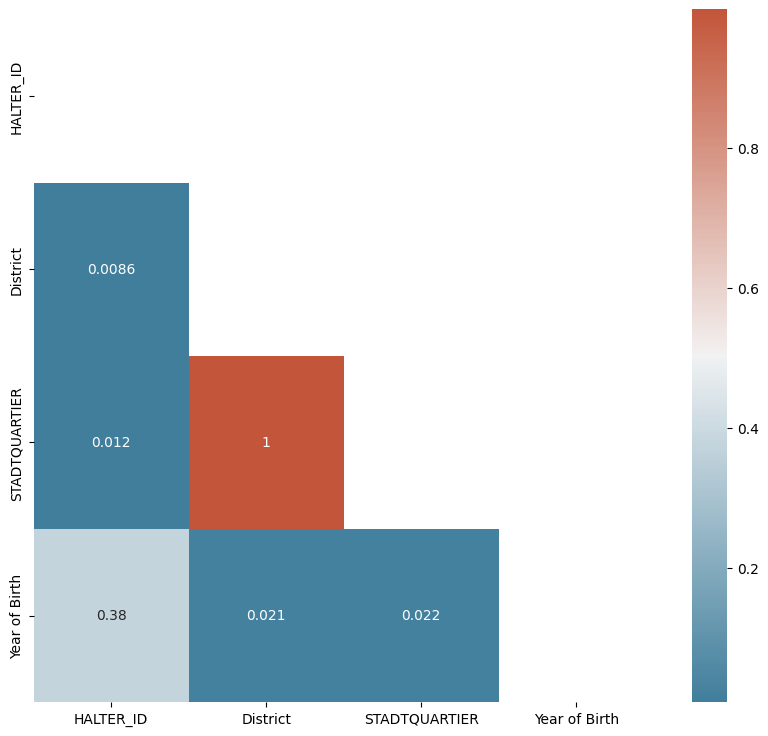

In [112]:
def get_heat_map_corr(corr_df, figsize=(10, 9), remove_cols=[], corr_method='pearson', title=None):

    df_temp = corr_df
    for i in remove_cols:
        try:
            df_temp = df_temp.drop(i,axis=1)
        except:
            print(f'column {i} not found')
    
    for c in df_temp.columns:
        if df_temp[c].dtype == 'object':
            df_temp = df_temp.drop(c,axis=1)

    corr = df_temp.corr(method=corr_method)

    f, ax = plt.subplots(figsize=figsize)

    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    if title != None:
        plt.title(title)

    # sns.heatmap(corr, annot=True, cmap=cmap)
    sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
get_heat_map_corr(df)
# df

Owner Gender
w    4958
m    2197
Name: count, dtype: int64

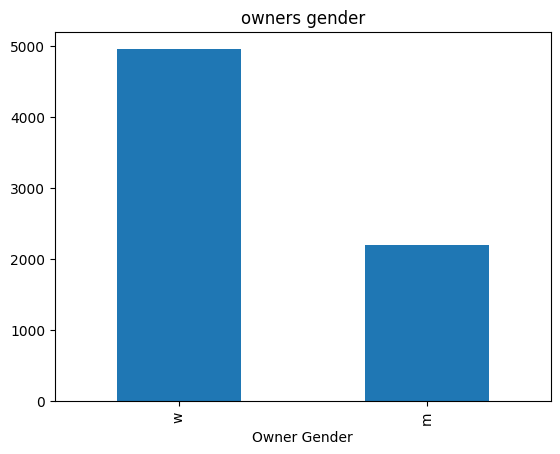

In [113]:
df['Owner Gender'].value_counts().plot(kind='bar', title='owners gender')
df['Owner Gender'].value_counts()

Dog Gender
w    3608
m    3547
Name: count, dtype: int64

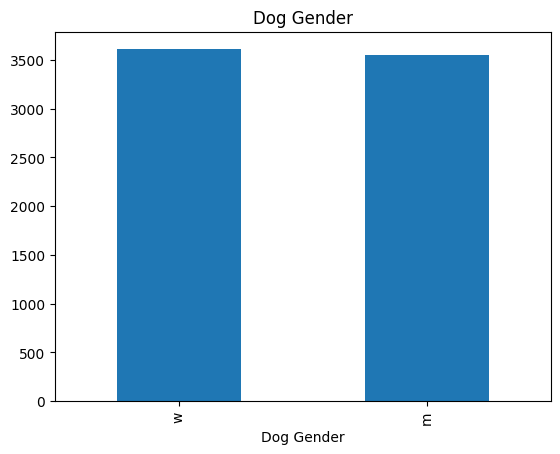

In [114]:
df['Dog Gender'].value_counts().plot(kind='bar', title='Dog Gender')
df['Dog Gender'].value_counts()

<Axes: ylabel='Primary Breed'>

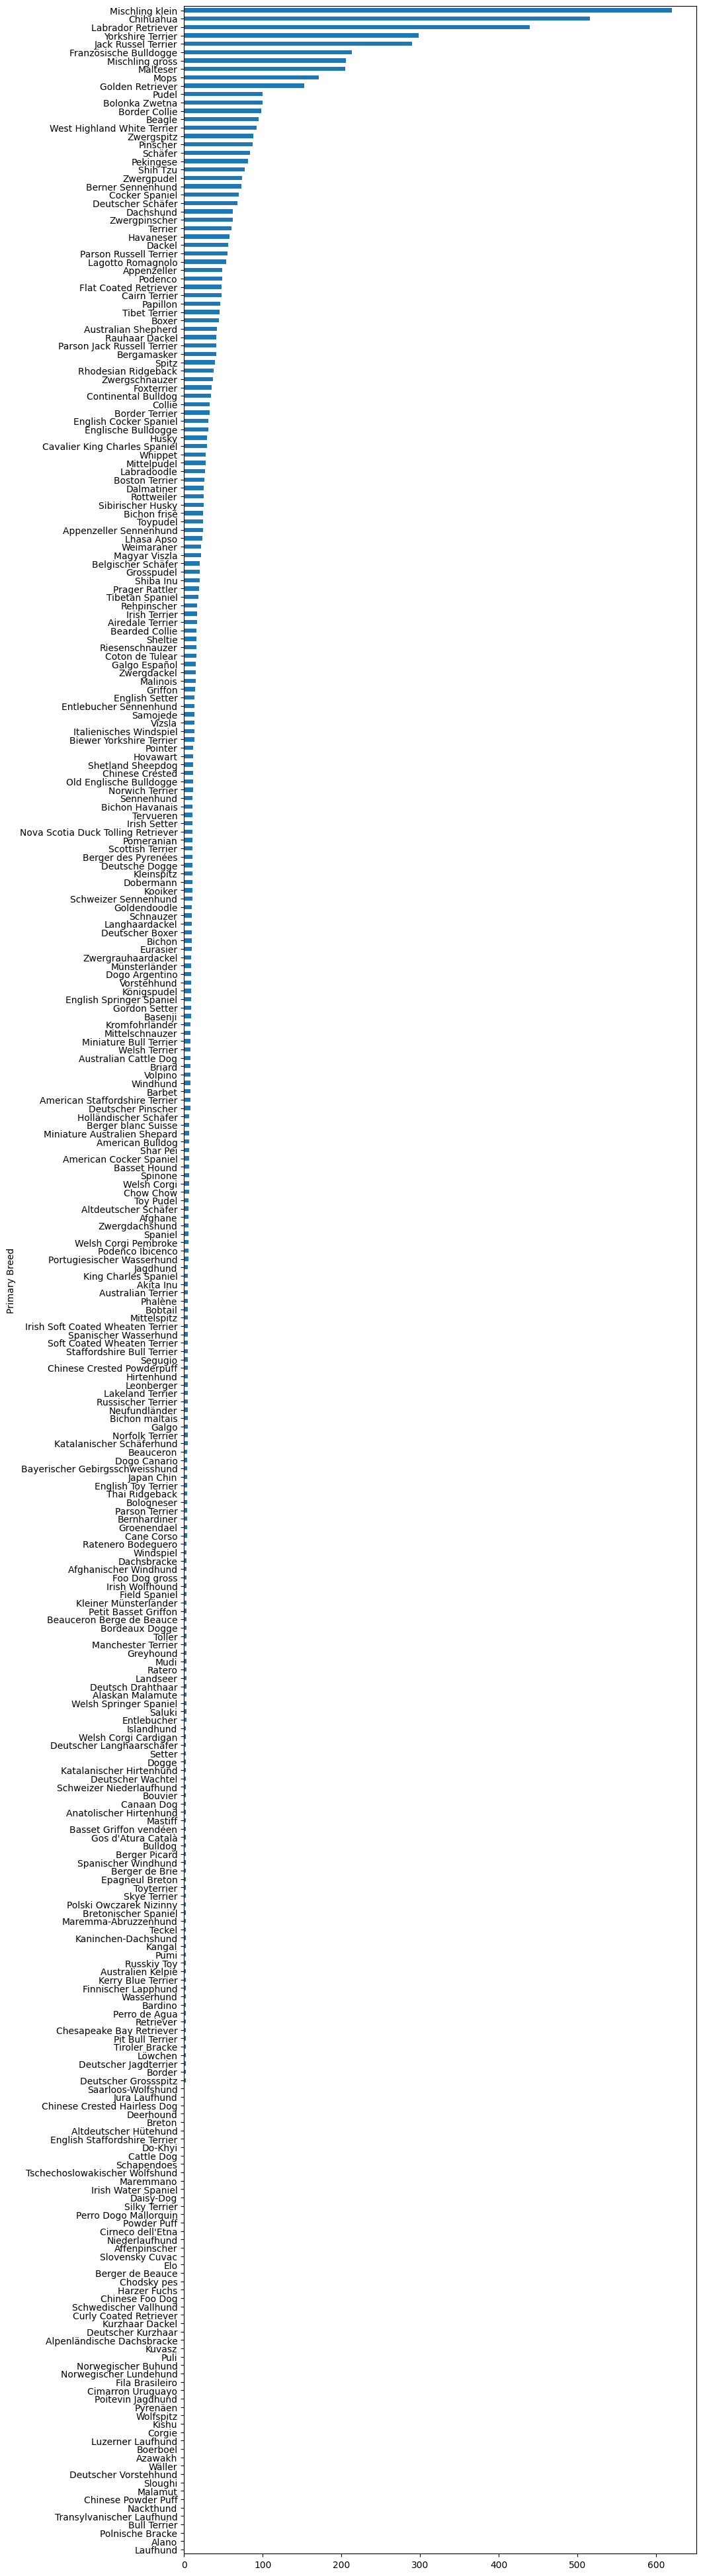

In [115]:
# df['Primary Breed'].value_counts().sort_values()
# top_breeds = df['Primary Breed'].value_counts()
# plt.figure(figsize=(20, 50))
# plt.barh(top_breeds.index, top_breeds, )
df['Primary Breed'].value_counts().sort_values().plot(kind='barh', figsize=(10, 50))

In [116]:
age_range = range (int(df['Age'][0].split('-')[0]), int(df['Age'][0].split('-')[1]))

df[['Age_B','Age_T']] = df['Age'].str.split('-', expand=True)
# df['Age_B'] = df['Age_B'].astype(int)
# df['Age_B'].isnull().sum()
df['Age_T'] = pd.to_numeric(df['Age_T'], errors='coerce').astype('Int64')
df['Age_B'] = pd.to_numeric(df['Age_B'], errors='coerce').astype('Int64')

age_avg = (df['Age_B'] + df['Age_T']) / 2
df['Age_avg'] = age_avg
df
# # df.columns
# # df.dtypes
# rearange cols
df = df[['HALTER_ID','Age','Age_avg','Age_B','Age_T','Owner Gender','District','STADTQUARTIER','Primary Breed','RASSE1_MISCHLING','Secondary Breed','Breed Type','Year of Birth','Dog Gender','Color',]]

Text(0.5, 1.0, 'owner age distribution')

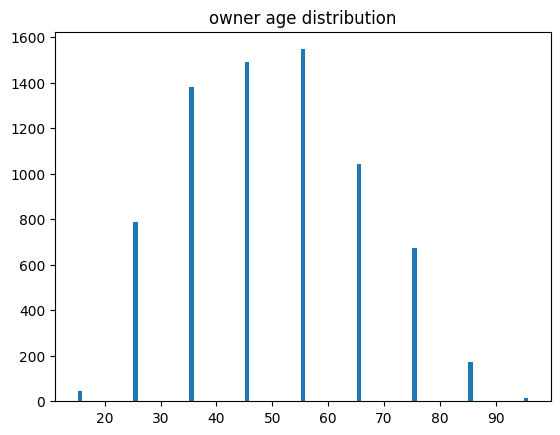

In [134]:
df["Age_avg"] = df["Age_avg"].fillna(df["Age_avg"].mean())
df["Age_avg"].isnull().sum()
df[df['Age_avg'].isnull()]["Age_avg"]

df["Age_avg"].value_counts()
plt.bar(df["Age_avg"].value_counts().index, df["Age_avg"].value_counts())
plt.title("owner age distribution")
# plt.hist2d(df["Age_avg"].index, df["Age_avg"],bins=100)

In [118]:
owner_gender_sort = df.groupby('Owner Gender')
male_owner = owner_gender_sort.get_group('m')
male_owner.dropna(inplace=True)
female_owner = owner_gender_sort.get_group('w')
female_owner.dropna(inplace=True)

C:\Users\Dime\AppData\Local\Temp\ipykernel_17100\2907106464.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_owner.dropna(inplace=True)
C:\Users\Dime\AppData\Local\Temp\ipykernel_17100\2907106464.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_owner.dropna(inplace=True)


11      45.5
13      65.5
76      75.5
144     55.5
386     85.5
1264    35.5
1791    25.5
3574    95.5
6594    15.5
Name: Age_avg, dtype: Float64

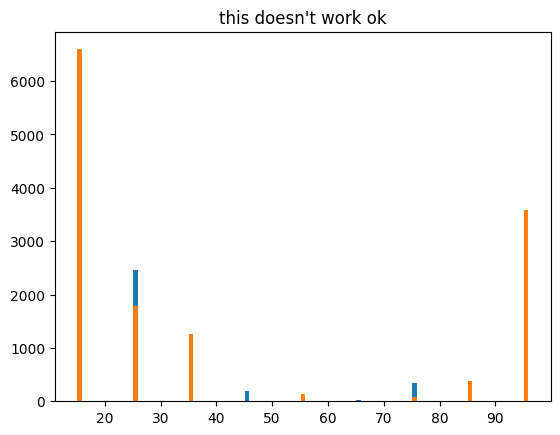

In [119]:
# # # # this doesn't work ok
# size = [
#     male_owner["Age_avg"].drop_duplicates().max(),
#     female_owner["Age_avg"].drop_duplicates().max(),
# ]
# x = np.arange(max(size))
# x_m = np.arange(male_owner["Age_avg"].drop_duplicates())
# # plt.bar(x, male_owner["Age_avg"].drop_duplicates().index)
# # plt.bar(male_owner["Age_avg"].drop_duplicates(), male_owner["Age_avg"].drop_duplicates().index)


# x = np.arange(10)
# fig, axs = plt.subplots(1,2)
# axs[0].scatter(x, x)
# axs[1].scatter(-x, x)

# # axs[0] = plt.bar(male_owner["Age_avg"].drop_duplicates(), male_owner["Age_avg"].drop_duplicates().index)
# # bars.bar_label(bar[0])

plt.bar(male_owner["Age_avg"].drop_duplicates(), male_owner["Age_avg"].drop_duplicates().index)
plt.bar(female_owner["Age_avg"].drop_duplicates(), female_owner["Age_avg"].drop_duplicates().index)

# plt.bar(x, male_owner["Age_avg"].drop_duplicates().index, )
# # plt.bar(male_owner["Age_avg"].drop_duplicates(), male_owner["Age_avg"].drop_duplicates().index, )

# plt.bar(x, female_owner["Age_avg"].drop_duplicates().index, )
# # plt.bar(female_owner["Age_avg"].drop_duplicates(), female_owner["Age_avg"].drop_duplicates().index, )

# female_owner["Age_avg"].drop_duplicates()
# f = male_owner['Age_avg'] < 30
# male_owner[f]
# # female_owner[['Age',	'Age_avg']].head(20)
plt.title("this doesn't work ok")
female_owner["Age_avg"].drop_duplicates()

In [120]:
print("top breeds owned by women")
print (female_owner["Primary Breed"].value_counts().head(5)) 
print("\nbreeds least owned by women")
print (female_owner["Primary Breed"].value_counts().tail(5)) 

top breeds owned by women
Primary Breed
Terrier                31
Schäfer                26
Jack Russel Terrier    24
Labrador Retriever     22
Pinscher               20
Name: count, dtype: int64

breeds least owned by women
Primary Breed
Foxterrier             1
Rhodesian Ridgeback    1
Niederlaufhund         1
Hirtenhund             1
Pomeranian             1
Name: count, dtype: int64


In [121]:
print("top breeds owned by men")
print (male_owner["Primary Breed"].value_counts().head(5)) 
print("\nbreeds least owned by men")
print (male_owner["Primary Breed"].value_counts().tail(5)) 

top breeds owned by men
Primary Breed
Labrador Retriever    25
Schäfer               20
Terrier               16
Appenzeller           14
Border Collie          8
Name: count, dtype: int64

breeds least owned by men
Primary Breed
Leonberger             1
Setter                 1
Australian Shepherd    1
Shiba Inu              1
Cocker Spaniel         1
Name: count, dtype: int64


In [122]:
# plt.bar(df['Year of Birth'].index,df['Year of Birth'])
df['Year of Birth'].describe()


for i in df['Year of Birth'].nsmallest(3):
    print(i)
    temp_df = df[ df['Year of Birth'] == i ]
    print(temp_df[['Age','Owner Gender','Primary Breed']])
    # print( df[ df['Year of Birth'] == i ]['Age','Owner Gender','Primary Breed'] )

1996
        Age Owner Gender Primary Breed
5420  41-50            w         Spitz
1997
        Age Owner Gender Primary Breed
962   61-70            w     Dachshund
1081  81-90            w      Malteser
1997
        Age Owner Gender Primary Breed
962   61-70            w     Dachshund
1081  81-90            w      Malteser


Text(0.5, 1.0, 'owner age')

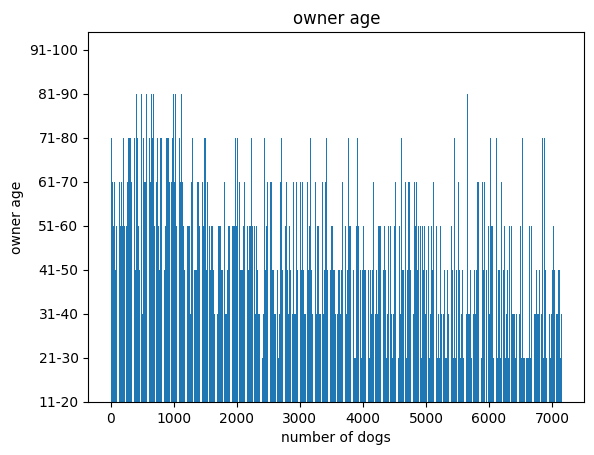

In [123]:
# plt.hist(df['Age_avg'].dropna())
# df[['Age','Age_avg','Age_B','Age_T',]].drop_duplicates()
# plt.scatter(df['Age'].sort_values().dropna().index, df['Age'].sort_values().dropna())
plt.bar(df['Age'].sort_values().dropna().index, df['Age'].sort_values().dropna())
plt.xlabel('number of dogs')
plt.ylabel('owner age')
plt.title('owner age')
# df

Breed Type
K     4505
I     2632
II      18
Name: count, dtype: int64

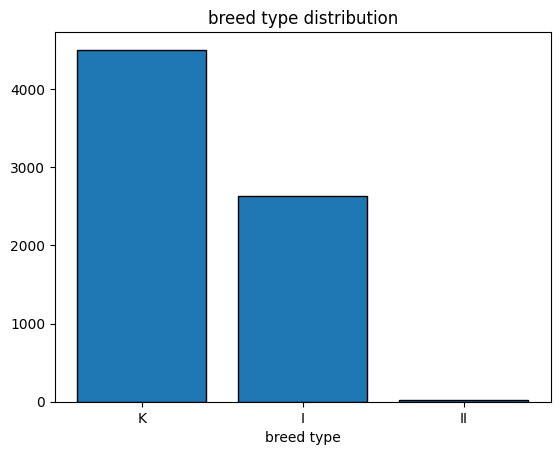

In [124]:
# breed_type_gruop.value_counts()
# breed_type_gruop = df.groupby('Breed Type')

breed_name = df['Breed Type'].value_counts().index
breed_val = df['Breed Type'].value_counts().values
plt.bar(breed_name,breed_val,edgecolor='black')
plt.xlabel('breed type')
plt.title('breed type distribution')
# plt.bar(df['Breed Type'].index, df['Breed Type'])
df['Breed Type'].value_counts()

District
11.0    1198
7.0     1009
9.0      855
10.0     680
2.0      635
3.0      633
12.0     518
6.0      517
8.0      378
4.0      376
5.0      232
1.0      123
dtype: int64

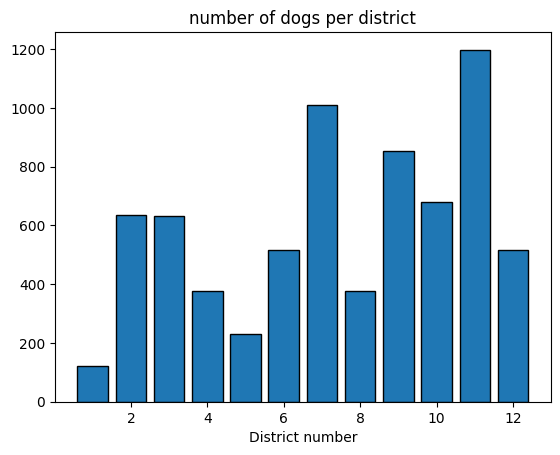

In [125]:
district_group = df.groupby('District')
district_group.value_counts()
district_group.size().index
plt.bar(district_group.size().index, district_group.size(), edgecolor='black')
plt.xlabel("District number")
plt.title("number of dogs per district")

district_group.size().sort_values(ascending=False)

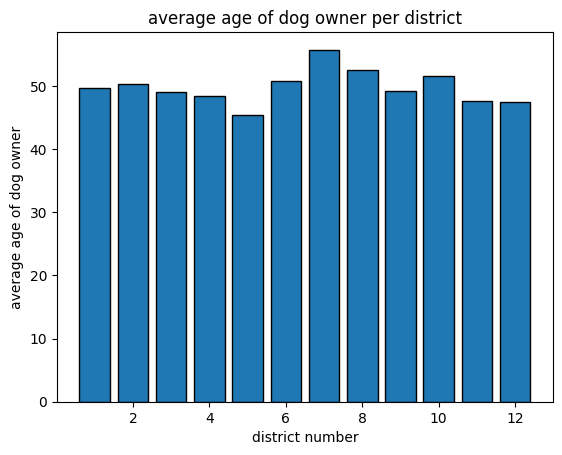

In [126]:
age_distr = district_group['Age_avg'].mean()
plt.bar(age_distr.index.astype(int), age_distr.values, edgecolor='black')
plt.xlabel('district number')
plt.ylabel('average age of dog owner')
plt.title('average age of dog owner per district')
plt.xticks = age_distr.index
# age_distr.values
# age_distr.index.astype(int)

In [127]:
district_group['Primary Breed'].value_counts()
top_breed_dict = {}
bottom_breed_dict = {}
for k,v in district_group:
    top_breed = v['Primary Breed'].value_counts().head(10)
    bottom_breed = v['Primary Breed'].value_counts().tail(10)
    print()
    print(f"district nr.{int(k)}")
    print("\t top breeds:")
    print("\t\t",top_breed.index[0])
    print("\t\t",top_breed.index[1])
    print("\t\t",top_breed.index[2])
    print("\t bottom breeds:")
    print("\t\t",bottom_breed.index[0])
    print("\t\t",bottom_breed.index[1])
    print("\t\t",bottom_breed.index[2])
    top_breed_dict[k] = [top_breed.index[0],top_breed.index[1],top_breed.index[2],top_breed.index[3],top_breed.index[4],top_breed.index[5],top_breed.index[6],top_breed.index[7],top_breed.index[8],top_breed.index[9],]
    bottom_breed_dict[k] = [bottom_breed.index[0],bottom_breed.index[1],bottom_breed.index[2],bottom_breed.index[3],bottom_breed.index[4],bottom_breed.index[5],bottom_breed.index[6],bottom_breed.index[7],bottom_breed.index[8],bottom_breed.index[9],]



district nr.1
	 top breeds:
		 Chihuahua
		 Mischling klein
		 Jack Russel Terrier
	 bottom breeds:
		 Neufundländer
		 Zwergdackel
		 Appenzeller

district nr.2
	 top breeds:
		 Mischling klein
		 Labrador Retriever
		 Chihuahua
	 bottom breeds:
		 Pumi
		 Toypudel
		 Petit Basset Griffon

district nr.3
	 top breeds:
		 Mischling klein
		 Chihuahua
		 Labrador Retriever
	 bottom breeds:
		 Staffordshire Bull Terrier
		 English Cocker Spaniel
		 Cavalier King Charles Spaniel

district nr.4
	 top breeds:
		 Chihuahua
		 Mischling klein
		 Französische Bulldogge
	 bottom breeds:
		 Katalanischer Schäferhund
		 Malinois
		 Old Englische Bulldogge

district nr.5
	 top breeds:
		 Chihuahua
		 Labrador Retriever
		 Mischling klein
	 bottom breeds:
		 Podenco
		 Continental Bulldog
		 Jagdhund

district nr.6
	 top breeds:
		 Mischling klein
		 Labrador Retriever
		 Jack Russel Terrier
	 bottom breeds:
		 Pointer
		 Airedale Terrier
		 Shar Pei

district nr.7
	 top breeds:
		 Mischling klein


In [128]:
top_breed_df = pd.DataFrame(top_breed_dict)
top_breed_df.head(3)

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
0,Chihuahua,Mischling klein,Mischling klein,Chihuahua,Chihuahua,Mischling klein,Mischling klein,Mischling klein,Mischling klein,Mischling klein,Chihuahua,Chihuahua
1,Mischling klein,Labrador Retriever,Chihuahua,Mischling klein,Labrador Retriever,Labrador Retriever,Labrador Retriever,Labrador Retriever,Chihuahua,Labrador Retriever,Mischling klein,Yorkshire Terrier
2,Jack Russel Terrier,Chihuahua,Labrador Retriever,Französische Bulldogge,Mischling klein,Jack Russel Terrier,Mischling gross,Chihuahua,Yorkshire Terrier,Jack Russel Terrier,Yorkshire Terrier,Mischling klein


In [129]:
bottom_breed_df = pd.DataFrame(bottom_breed_dict)
bottom_breed_df.head(3)

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
0,Neufundländer,Pumi,Staffordshire Bull Terrier,Katalanischer Schäferhund,Podenco,Pointer,Irish Terrier,Appenzeller,Segugio,Shiba Inu,Sheltie,Flat Coated Retriever
1,Zwergdackel,Toypudel,English Cocker Spaniel,Malinois,Continental Bulldog,Airedale Terrier,Gos d'Atura Català,Coton de Tulear,Toller,Cane Corso,Phalène,Münsterländer
2,Appenzeller,Petit Basset Griffon,Cavalier King Charles Spaniel,Old Englische Bulldogge,Jagdhund,Shar Pei,Deerhound,Irish Water Spaniel,Maremmano,Sheltie,Chinese Crested Powderpuff,Katalanischer Hirtenhund


In [130]:
filt = df['Secondary Breed'] != False
cols = [
    'Age',
    'Age_avg',
    'Owner Gender',
    'District',
    'Primary Breed',
    'RASSE1_MISCHLING',
    'Secondary Breed',
    'Breed Type',
    'Dog Gender',
]
df[filt][cols]

,Age,Age_avg,Owner Gender,District,Primary Breed,RASSE1_MISCHLING,Secondary Breed,Breed Type,Dog Gender
32,61-70,65.5,m,3.0,Cocker Spaniel,NaN,Labrador Retriever,I,m
78,41-50,45.5,m,8.0,Labrador Retriever,NaN,Border Collie,I,m
87,61-70,65.5,w,9.0,Pinscher,NaN,Yorkshire Terrier,K,w
147,31-40,35.5,m,7.0,Mops,NaN,Beagle,K,w
150,51-60,55.5,w,11.0,Chihuahua,NaN,Prager Rattler,K,m
...,...,...,...,...,...,...,...,...,...
7100,71-80,75.5,w,10.0,Chihuahua,NaN,Cavalier King Charles Spaniel,K,m
7110,31-40,35.5,w,6.0,Königspudel,NaN,Labrador Retriever,I,w
7125,31-40,35.5,w,11.0,Jack Russel Terrier,NaN,Shiba Inu,K,m
7127,31-40,35.5,w,9.0,Bichon,NaN,Malteser,K,w


In [131]:
# cols_to_label = ['Owner Gender', 'RASSENTYP',]

# label = LabelEncoder()

# for c in cols_to_label:
#     label.fit(df[c].drop_duplicates())
#     df[c] = label.transform(df[c])
# df